## Clustering with polygons
### Dataset Bcn

This notebook executes ClusterApplication to create a clusters shapefile from the data contained in the specified dataset.

This dataset contains localities from the Spanish area of Barcelona. Data consists in the polygon geometry and a numeric attribute - the population of the locality.

In [42]:
%matplotlib inline

import subprocess
import matplotlib.pyplot as plt
import shapefile
import numpy as np

### Execution

** Algorithm: ** DBSCAN (eps = 15000, minPts = 0)

** Distance: ** Combined (Hausdorff * 111000 + AbsoluteDiff * 0.1)

** Results: ** we are using the weights to convert the distance in coordinates to a distance in meters, in an attempt to regularize the data. We are getting good results as there is a cluster containing Sabadell and Terrassa, two cities with similar population and near each other. Even though Badalona has also a similar population, it is placed in a different cluster because its far from them.

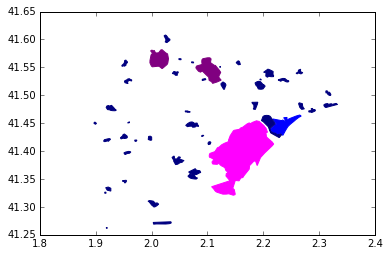

In [45]:
subprocess.call(
    ['java', '-jar', 'combined.jar', 'Bcn', '111000', '0.1', '15000', '0'], 
    stdout=None, stderr=None)

# Plot elements colored by cluster
colors = ['#FF00FF','#800080','#0000FF','#000080','#00FFFF','#008080','#00FF00','#008000','#FFFF00',
          '#808000','#FF0000','#800000','#C0C0C0','#808080','#000000']

i = 0
sf = shapefile.Reader("cluster")
for sr in sf.shapes():
    j = 0
    mat = np.transpose(sr.points)
    length = np.shape(mat)[1]
    
    parts = sr.parts
    parts = np.append(parts, length)
    parts = parts[1:]
    
    for index in parts:
        points_x = []
        points_y = []

        while j < index:
            points_x = np.append(points_x, [mat[0,j]])
            points_y = np.append(points_y, mat[1,j])
            j = j + 1

        plt.fill(points_x,points_y,color=colors[i])
        
    i = i + 1
        
plt.show()

## Conclusions
We have checked that normalizing the attributes is very important when using the combined distance. If they are not explicitly normalized, we can still get good enough results by using the weights with a regularization purpose.

### Cleanup

In [1]:
import os, fnmatch
for root, dirs, files in os.walk('.', topdown=False):
    for pattern in ['*.dbf','*.fix','*.prj','*.shp','*.shx']:
        for name in fnmatch.filter(files, pattern):
            os.remove(name)